The Entertainment Capital of the World! 

Renowned for its sunny climate, palm-lined streets, and entertainment industry, LA also grapples with the challenges of urban life, including crime. I will be analyzing LA's  crime data to discern trends in criminal activity. The findings can be used to strategically allocate resources to address different types of crime across various neighborhoods.

#### The Data 
Datacamp has provided me with a dataset to use. The original data is publicly available from Los Angeles Open Data. Project idea credit belongs to datacamp.com


In [144]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [145]:
#find the data types of the columns 
print(crimes.dtypes)

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object


In [146]:
# DATA CLEANING BEFORE ANALYSIS - Part 1

# Remove any possible fully duplicate rows
crimes.drop_duplicates(inplace=True)

# Filter out possible rows where victim age is less than 0 or greater than 120
crimes = crimes[(crimes['Vict Age'] >= 0) & (crimes['Vict Age'] <= 120)]

In [147]:
# Data cleaning - part 2 - Make sure the time is valid

# Filter out possible rows where TIME OCC is not in the format HHMM or not within 0000-2359
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str)
valid_time_mask = crimes['TIME OCC'].str.match(r'^[0-2][0-9][0-5][0-9]$') & (crimes['TIME OCC'].astype(int) >= 0) & (crimes['TIME OCC'].astype(int) <= 2359)
crimes = crimes[valid_time_mask] # Apply the mask to filter out invalid rows

Which hour has the highest frequency of crimes?
- 12pm

In [148]:
peak_crime_time = crimes['TIME OCC'].mode()
print(peak_crime_time[0])

1200


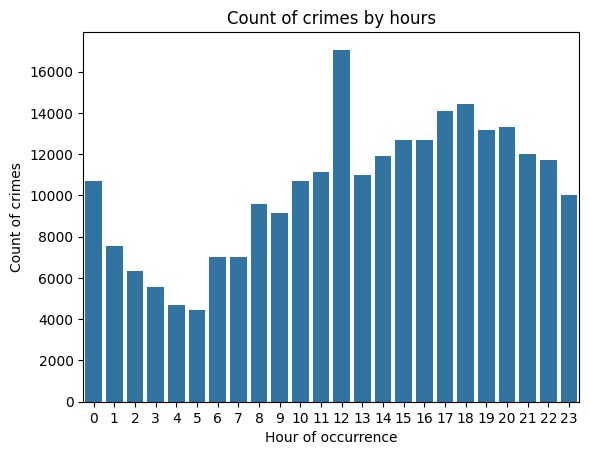

In [149]:
crimes['hour_occ'] = crimes['TIME OCC'].str[:2].astype(int)
sns.countplot(data=crimes, x='hour_occ')
plt.xlabel('Hour of occurrence')
plt.ylabel('Count of crimes')
plt.title('Count of crimes by hours')
plt.show()

Which area has the largest frequency of night crimes
- Central

In [150]:
night_crimes = crimes[crimes['hour_occ'].isin([22, 23, 0, 1, 2, 3])]
night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour_occ
9,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
12,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
36,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
39,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
42,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [151]:
night_crimes = night_crimes['AREA NAME'].value_counts().to_frame()
night_crimes.head(5)

,count
AREA NAME,
Central,4090
77th Street,3362
Hollywood,3299
Newton,2927
Southeast,2884


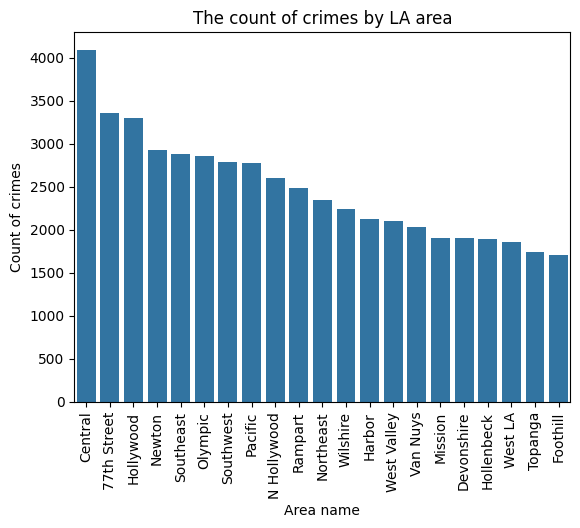

In [152]:
sns.barplot(data=night_crimes, x=night_crimes.index, y='count')
plt.xticks(rotation=90)
plt.xlabel('Area name')
plt.ylabel('Count of crimes')
plt.title('The count of crimes by LA area')
plt.show()

Identify the number of crimes committed against victims by age group

In [153]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


In [154]:
victim_ages = victim_ages.to_frame()
victim_ages.head()

,count
Age Bracket,
26-34,47470
35-44,42157
45-54,28353
18-25,28291
55-64,20169


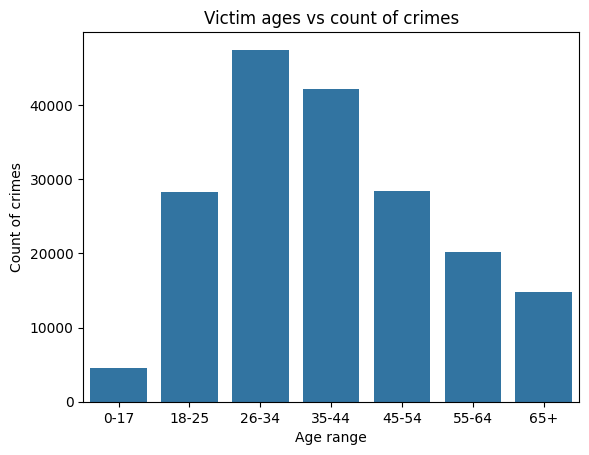

In [155]:
sns.barplot(data=victim_ages, x=victim_ages.index, y='count')
plt.xlabel('Age range')
plt.ylabel('Count of crimes')
plt.title('Victim ages vs count of crimes')
plt.show()